# **Iris Flower Classification**

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading csv file

In [ ]:
url="/content/IRIS.csv"
df=pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Basic Information of dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Columns of dataframe

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Descriptive statistics of dataframe

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data types of columns of dataframe

In [ ]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


### Checking null values

In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


### Checking for duplicate values

In [ ]:
df.duplicated().sum()

3

In [ ]:
#handling duplicate values
df.drop_duplicates(inplace=True)

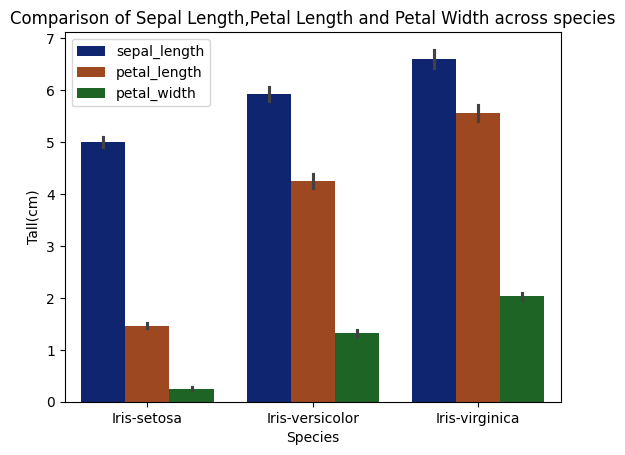

In [ ]:
#comparison of sepal length,petal length,petal width across species
df1=df.melt(id_vars="species",value_vars=["sepal_length","petal_length","petal_width"],var_name="Iris feature",value_name="tall")
sns.barplot(x="species",y="tall",hue="Iris feature",data=df1,palette="dark")
plt.xlabel("Species")
plt.ylabel("Tall(cm)")
plt.title("Comparison of Sepal Length,Petal Length and Petal Width across species")
plt.legend()
plt.show()

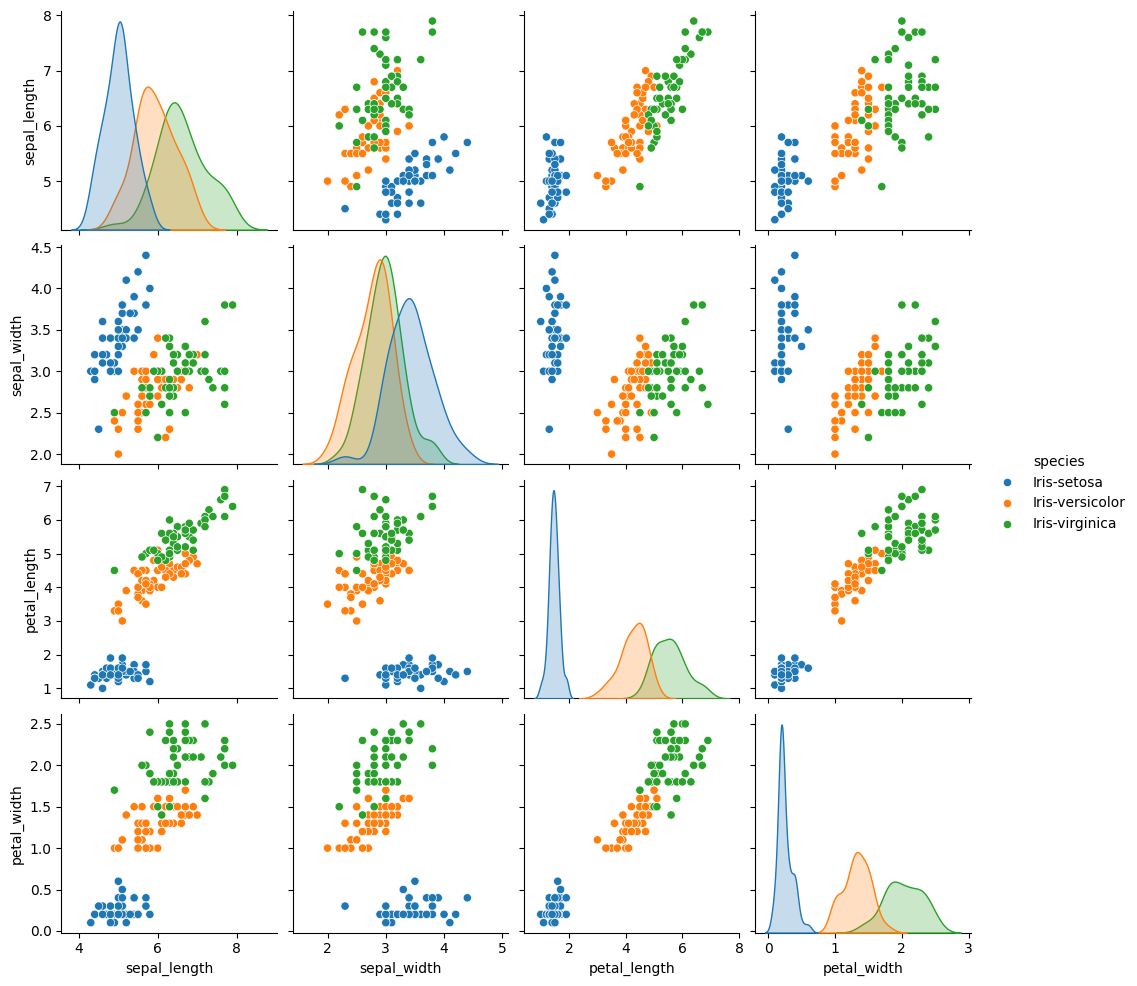

In [ ]:
sns.pairplot(df,hue="species")
plt.show()

In [ ]:
df1=df[["sepal_length","sepal_width","petal_length","petal_width","species"]]

In [ ]:
df1["species"]=df1["species"].replace({"Iris-setosa":2,"Iris-versicolor":3,"Iris-virginica":1})
df1=df1.infer_objects(copy=False)

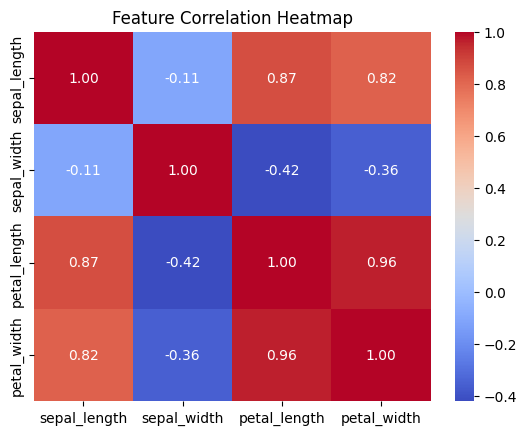

In [ ]:
#correlation heatmap
sns.heatmap(df.drop(columns=["species"]).corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#encoding target variable
from sklearn.preprocessing import StandardScaler,LabelEncoder
label_encoder=LabelEncoder()
df["species"]=label_encoder.fit_transform(df["species"])

In [ ]:
#feature scaling
scaler=StandardScaler()
x=df.iloc[:,:-1]
y=df["species"]
x_scaled=scaler.fit_transform(x)

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
#model building
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred=rf_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Model Accuracy: {accuracy:.2f}')


Model Accuracy: 0.93


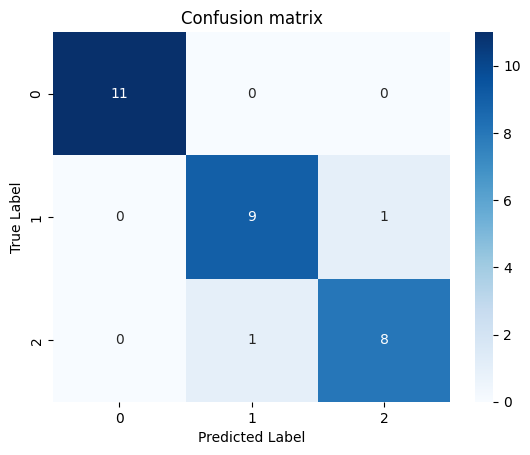

In [ ]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

### Conclusion

Using measurements of the sepals and petals, the Random Forest Classifier was successfully trained to categorize different species of iris flowers.  The model's excellent accuracy showed how well it could differentiate between Iris-setosa, Iris-versicolor, and Iris-virginica.  A correlation heatmap and data visualization offered insightful information about feature correlations.  Strong classification performance was confirmed by the confusion matrix, indicating that the model is dependable for predictions in the actual world.